# **Feedforward Neural Network**

## **Import Libraries**

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (classification_report, confusion_matrix, ConfusionMatrixDisplay,
                             precision_score, recall_score, f1_score, roc_auc_score, roc_curve)

## **Read Dataset**

In [2]:
# Load the dataset that has been preprocessed
data = pd.read_csv('dataset/preprocessed_breast-cancer.csv')

# Extract features (X) and target (y) from the dataset
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values.reshape(-1, 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Apply Scaling**

In [3]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Model Building**

In [4]:
input_dim = X.shape[1]

model = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,), kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,849 (58.00 KB)

 Trainable params: 14,849 (58.00 KB)

 Non-trainable params: 0 (0.00 B)

## **Model Training**

In [6]:
history = model.fit(X_train, y_train, validation_split=0.2,
                    epochs=30, batch_size=32, verbose=1)

Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 226ms/step - accuracy: 0.5171 - loss: 2.5929 - val_accuracy: 0.8242 - val_loss: 2.3947
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.5775 - loss: 2.3548 - val_accuracy: 0.9121 - val_loss: 2.1666
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.6934 - loss: 2.1131 - val_accuracy: 0.8352 - val_loss: 1.9537
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.7229 - loss: 1.9229 - val_accuracy: 0.8352 - val_loss: 1.7601
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.7302 - loss: 1.7407 - val_accuracy: 0.8462 - val_loss: 1.5916
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.7574 - loss: 1.5940 - val_accuracy: 0.8462 - val_loss: 1.4381
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.7736 - loss: 1.4416 - val_accuracy: 0.8681 - val_loss: 1.2949
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.7794 - loss: 1.3206 - val_accuracy: 0.8901 -

## **Model Evaluation**

In [7]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"\nTest Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}\n")

y_pred_probs = model.predict(X_test).ravel()
y_pred = (y_pred_probs > 0.5).astype(int)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.9703 - loss: 0.3109

Test Loss: 0.30348488688468933
Test Accuracy: 0.9649122953414917

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 270ms/step


In [8]:
average_precision = precision_score(y_test, y_pred, average='macro')
average_recall = recall_score(y_test, y_pred, average='macro')
average_f1 = f1_score(y_test, y_pred, average='macro')

print(f"Average Precision: {average_precision:.4f}")
print(f"Average Recall: {average_recall:.4f}")
print(f"Average F1-Score: {average_f1:.4f}")

Average Precision: 0.9673
Average Recall: 0.9581
Average F1-Score: 0.9623


In [9]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



## **Visualisation**

### **Confusion Matrix**

<Figure size 800x600 with 0 Axes>

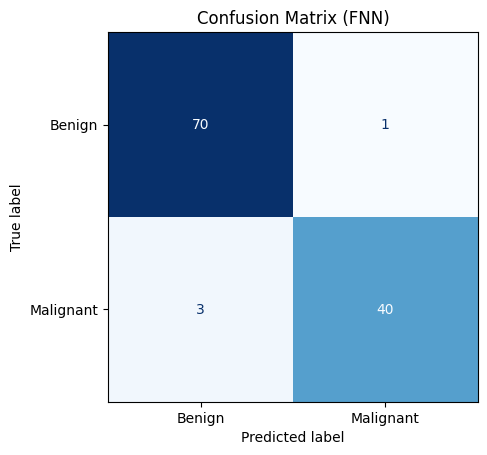

In [10]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])

plt.figure(figsize=(8, 6))

disp.plot(cmap=plt.cm.Blues, values_format="d", colorbar=False)
plt.title("Confusion Matrix (FNN)")

plt.show()

### **Accuracy of Training and Validation**

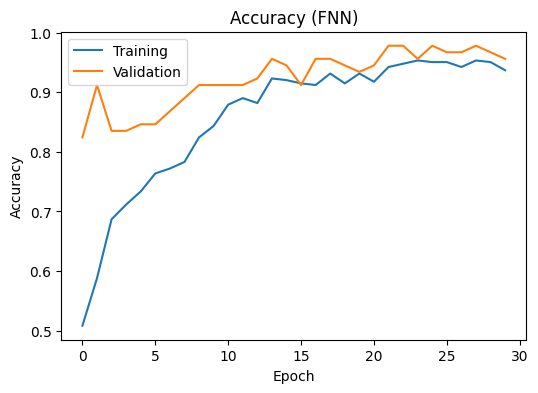

In [11]:
plt.figure(figsize=(6, 4))

plt.title('Accuracy (FNN)')
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

### **Loss of Training and Validation**

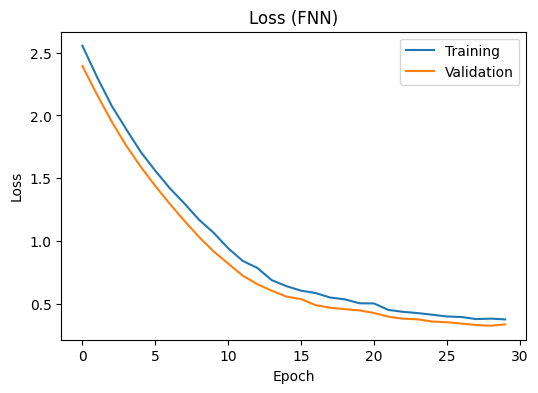

In [12]:
plt.figure(figsize=(6, 4))

plt.title('Loss (FNN)')
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.show()

### **Distribution of Predicted Probabilities**

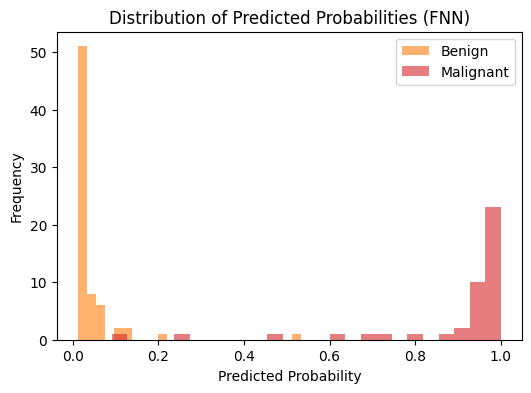

In [13]:
plt.figure(figsize=(6, 4))

plt.title('Distribution of Predicted Probabilities (FNN)')
plt.hist(y_pred_probs[y_test.ravel() == 0], bins=25, alpha=0.6, color='tab:orange', label='Benign')
plt.hist(y_pred_probs[y_test.ravel() == 1], bins=25, alpha=0.6, color='tab:red', label='Malignant')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')

plt.legend()
plt.show()

### **Receiver Operating Characteristic (ROC) Curve**

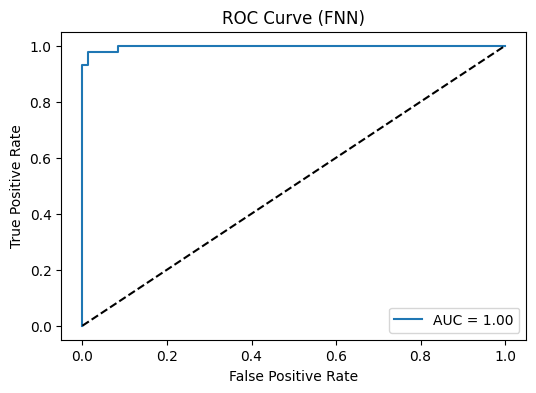

In [14]:
roc_auc = roc_auc_score(y_test, y_pred_probs)
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)

plt.figure(figsize=(6, 4))

plt.title('ROC Curve (FNN)')
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()